In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyepidisplay.data import data

In [5]:
outbreak = data("Outbreak")

In [6]:
outbreak

,id,sex,age,exptime,beefcurry,saltegg,eclair,water,onset,nausea,vomiting,abdpain,diarrhea
0,1,1,13,2.533083e+13,1,1,1.0,1,2.533083e+13,1,1,1,1
1,2,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
2,3,1,13,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
3,4,1,15,2.533083e+13,1,1,0.5,1,NaN,0,0,0,0
4,5,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1068,1,20,2.533083e+13,1,1,1.0,1,NaN,0,0,0,0
1090,1069,1,19,2.533083e+13,1,1,1.0,1,NaN,0,0,0,0
1091,1070,1,19,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
1092,1071,1,17,2.533083e+13,1,1,90.0,1,2.533083e+13,1,1,1,0


In [8]:
outbreak.head()

,id,sex,age,exptime,beefcurry,saltegg,eclair,water,onset,nausea,vomiting,abdpain,diarrhea
0,1,1,13,2.533083e+13,1,1,1.0,1,2.533083e+13,1,1,1,1
1,2,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
2,3,1,13,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
3,4,1,15,2.533083e+13,1,1,0.5,1,NaN,0,0,0,0
4,5,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0


Pandas framework read_csv function would automatically use scientific notation for large numbers. To avoid this, we can use the dtype parameter to specify the data type of the column as string. However, it will lose mathmatical operations on that column.

In [9]:
outbreak_age = outbreak['age'].value_counts().sort_index()
outbreak_age

age
1       2
6       1
8       1
9       6
10     11
11     56
12     58
13     68
14     95
15    110
16     71
17     55
18     62
19     55
20     61
21     36
22     44
23     23
24     24
25     10
26     24
27     19
28     19
29     12
30     21
31     13
32      9
33      4
34      8
35      9
36      4
37      1
38      6
39      3
40      3
41      3
42      1
43      3
44      4
45      2
46      5
47      2
48      2
49      1
50      5
51      1
58      1
99     60
Name: count, dtype: int64

In [10]:
type(outbreak_age)

pandas.core.series.Series

need to convert outbreak_age into a DataFrame

In [11]:
outbreak_age_df = outbreak_age.reset_index('age')
outbreak_age_df.columns = ['age', 'frequency']
outbreak_age_df = outbreak_age_df.set_index('age')
outbreak_age_df

,frequency
age,
1,2
6,1
8,1
9,6
10,11
11,56
12,58
13,68
14,95


In [12]:
outbreak_age_df["percent"] = (outbreak_age_df['frequency'] / len(outbreak) * 100).round(1)
outbreak_age_df

,frequency,percent
age,,
1,2,0.2
6,1,0.1
8,1,0.1
9,6,0.5
10,11,1.0
11,56,5.1
12,58,5.3
13,68,6.2
14,95,8.7


In [13]:
# calculate the cumulative percent
outbreak_age_df['cum.percent'] = outbreak_age_df['percent'].cumsum()
outbreak_age_df

,frequency,percent,cum.percent
age,,,
1,2,0.2,0.2
6,1,0.1,0.3
8,1,0.1,0.4
9,6,0.5,0.9
10,11,1.0,1.9
11,56,5.1,7.0
12,58,5.3,12.3
13,68,6.2,18.5
14,95,8.7,27.2


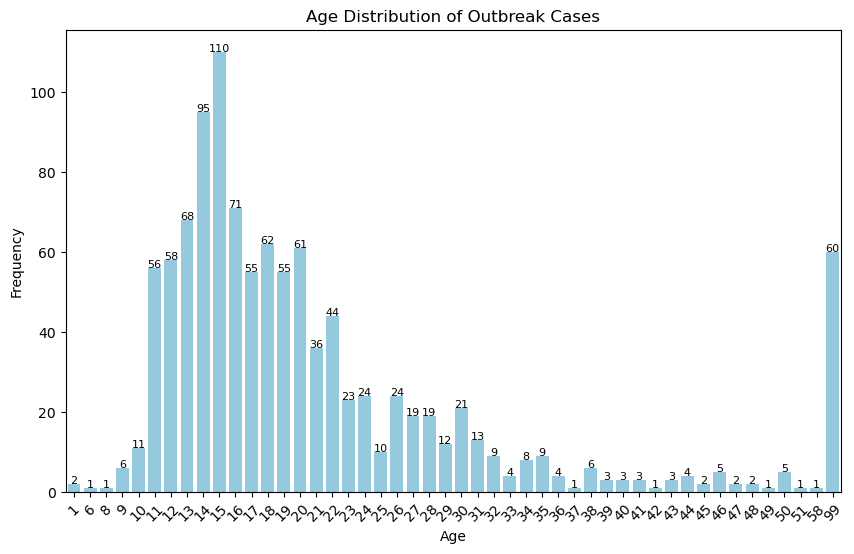

In [14]:
# plot the bar chart of frequency
plt.figure(figsize=(10,6))
sns.barplot(x=outbreak_age_df.index, y='frequency', data=outbreak_age_df, color='skyblue')
# denote the counts on top of the bars, change text size if needed
for index, value in enumerate(outbreak_age_df['frequency']):
    plt.text(index, value, str(value), ha='center', fontsize=8) # str
plt.title('Age Distribution of Outbreak Cases')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def tab1(column, df):
    if type(df) is not pd.DataFrame:
        raise ValueError("Input data must be a pandas DataFrame.")
    else:
        pass
    if type(column) is not str:
        raise ValueError("Column name must be a string.")
    else:
        pass
    if column not in df.columns:
        raise ValueError("Column is not found in DataFrame.")
    else:
        pass
    for i in df[column]:
        if pd.isna(i):
            raise ValueError("Column contains NA values.")
        else:
            pass

    df_col = df[column].value_counts(dropna=False).sort_index()
    df_col_1 = df_col.reset_index(column)
    df_col_1.columns = [column, 'Frequency']
    df_col_1 = df_col_1.set_index(column)
    df_col_1['Percent'] = ((df_col_1['Frequency'] / len(df)) * 100).round(2)
    df_col_1['Cumulative Percent'] = df_col_1['Percent'].cumsum().round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_col_1.index.astype(str), y='Frequency', data=df_col_1, palette='viridis')
    for index, value in enumerate(df_col_1['Frequency']):
        plt.text(index, value, str(value), ha='center', va='bottom')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df_col_1

# need to test, NA, invalid input, adjustable parameters of plot 


/var/folders/g7/jrtbj9f97rv1shp60z4m29mh0000gn/T/ipykernel_6013/692074885.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_col_1.index.astype(str), y='Frequency', data=df_col_1, palette='viridis')


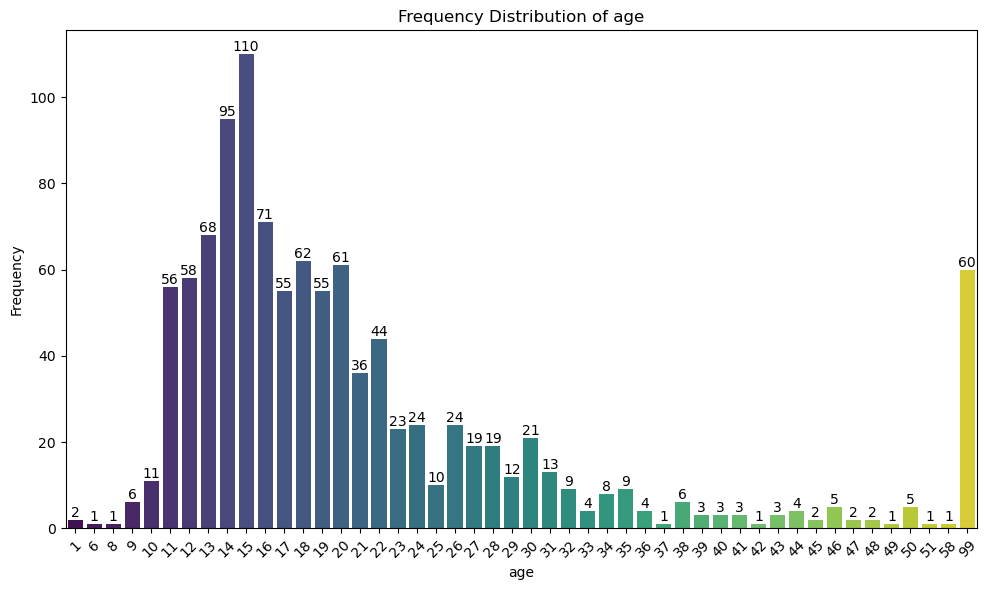

,Frequency,Percent,Cumulative Percent
age,,,
1,2,0.18,0.18
6,1,0.09,0.27
8,1,0.09,0.36
9,6,0.55,0.91
10,11,1.01,1.92
11,56,5.12,7.04
12,58,5.30,12.34
13,68,6.22,18.56
14,95,8.68,27.24


In [18]:
tab1("age", outbreak)

/var/folders/g7/jrtbj9f97rv1shp60z4m29mh0000gn/T/ipykernel_6013/692074885.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_col_1.index.astype(str), y='Frequency', data=df_col_1, palette='viridis')


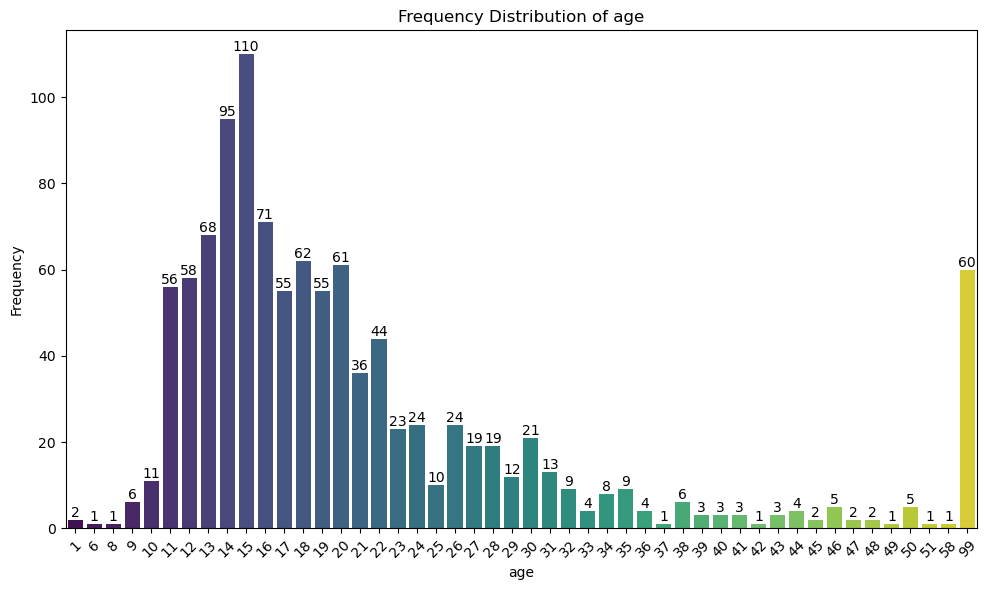

In [ ]:
# check the the value in column "Cumulative Percent" should be close to 100 in last row
# tab1("age", outbreak).iloc[-1]["Cumulative Percent"]  # should be close to 100
np.testing.assert_almost_equal(tab1("age", outbreak).iloc[-1]["Cumulative Percent"], 100.0, decimal=1)